### Loading the libraries: 

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder,StandardScaler
from sklearn.metrics import accuracy_score,recall_score,precision_score,f1_score,confusion_matrix,classification_report
%matplotlib inline

## **IRIS DATASET:**

In [ ]:
from sklearn.datasets import load_iris

###Loading the dataset:

In [ ]:
dataset = load_iris()
dataset

{'data': array([[5.1, 3.5, 1.4, 0.2],
        [4.9, 3. , 1.4, 0.2],
        [4.7, 3.2, 1.3, 0.2],
        [4.6, 3.1, 1.5, 0.2],
        [5. , 3.6, 1.4, 0.2],
        [5.4, 3.9, 1.7, 0.4],
        [4.6, 3.4, 1.4, 0.3],
        [5. , 3.4, 1.5, 0.2],
        [4.4, 2.9, 1.4, 0.2],
        [4.9, 3.1, 1.5, 0.1],
        [5.4, 3.7, 1.5, 0.2],
        [4.8, 3.4, 1.6, 0.2],
        [4.8, 3. , 1.4, 0.1],
        [4.3, 3. , 1.1, 0.1],
        [5.8, 4. , 1.2, 0.2],
        [5.7, 4.4, 1.5, 0.4],
        [5.4, 3.9, 1.3, 0.4],
        [5.1, 3.5, 1.4, 0.3],
        [5.7, 3.8, 1.7, 0.3],
        [5.1, 3.8, 1.5, 0.3],
        [5.4, 3.4, 1.7, 0.2],
        [5.1, 3.7, 1.5, 0.4],
        [4.6, 3.6, 1. , 0.2],
        [5.1, 3.3, 1.7, 0.5],
        [4.8, 3.4, 1.9, 0.2],
        [5. , 3. , 1.6, 0.2],
        [5. , 3.4, 1.6, 0.4],
        [5.2, 3.5, 1.5, 0.2],
        [5.2, 3.4, 1.4, 0.2],
        [4.7, 3.2, 1.6, 0.2],
        [4.8, 3.1, 1.6, 0.2],
        [5.4, 3.4, 1.5, 0.4],
        [5.2, 4.1, 1.5, 0.1],
  

In [ ]:
df = pd.DataFrame(data = dataset.data , columns = dataset.feature_names)
df

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2
...,...,...,...,...
145,6.7,3.0,5.2,2.3
146,6.3,2.5,5.0,1.9
147,6.5,3.0,5.2,2.0
148,6.2,3.4,5.4,2.3


In [ ]:
df['target'] = dataset.target
df['target'].replace({0:'setosa', 1:'versicolor',2:'virginica'}, inplace = True)

The dataframe:

In [ ]:
df

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,virginica
146,6.3,2.5,5.0,1.9,virginica
147,6.5,3.0,5.2,2.0,virginica
148,6.2,3.4,5.4,2.3,virginica


### Performing the data exploration:

In [ ]:
df.shape

(150, 5)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   sepal length (cm)  150 non-null    float64
 1   sepal width (cm)   150 non-null    float64
 2   petal length (cm)  150 non-null    float64
 3   petal width (cm)   150 non-null    float64
 4   target             150 non-null    object 
dtypes: float64(4), object(1)
memory usage: 6.0+ KB


In [ ]:
df.describe()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.057333,3.758000,1.199333
std,0.828066,0.435866,1.765298,0.762238
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


In [ ]:
df.isnull().sum()

sepal length (cm)    0
sepal width (cm)     0
petal length (cm)    0
petal width (cm)     0
target               0
dtype: int64

In [ ]:
df.columns

Index(['sepal length (cm)', 'sepal width (cm)', 'petal length (cm)',
       'petal width (cm)', 'target'],
      dtype='object')

In [ ]:
df.target.unique()

array(['setosa', 'versicolor', 'virginica'], dtype=object)

In [ ]:
df.target.value_counts()

setosa        50
versicolor    50
virginica     50
Name: target, dtype: int64



*   Balance class problem



Checking the outliers:

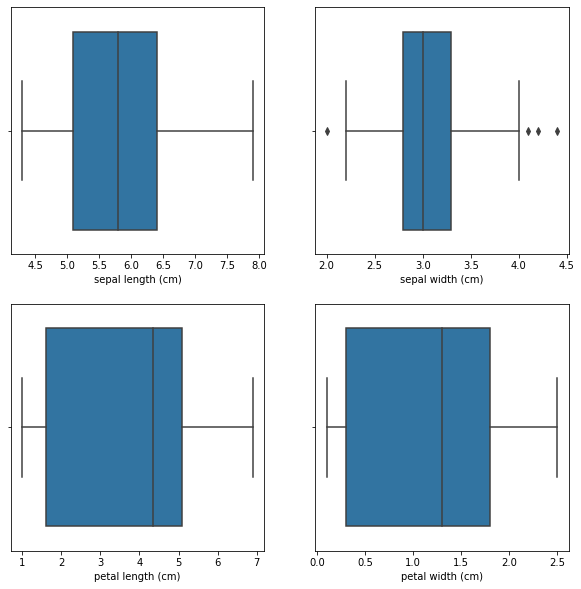

In [ ]:
cols = ['sepal length (cm)','sepal width (cm)','petal length (cm)','petal width (cm)']

plt.figure(figsize=(10, 10))
count = 1
for i in df[cols]:
  plt.subplot(2,2,count)
  sns.boxplot(x=i, data = df)
  count= count+1
plt.show()

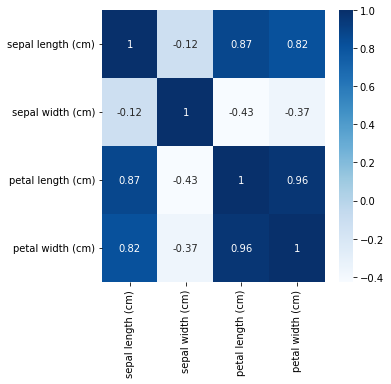

In [ ]:
plt.figure(figsize=(5,5))
sns.heatmap(df.corr(), cmap='Blues',annot=True)

### Feature Scaling:

In [ ]:
df.target = LabelEncoder().fit_transform(np.array(df['target']))
df

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,2
146,6.3,2.5,5.0,1.9,2
147,6.5,3.0,5.2,2.0,2
148,6.2,3.4,5.4,2.3,2


### Splitting the data:

In [ ]:
from sklearn.model_selection import train_test_split

X= df.drop(columns= ['target'])
y= df['target']

X_train , X_test , y_train, y_test = train_test_split(X,y,test_size = 0.3 , random_state =16)

In [ ]:
print("Size of training data : ", X_train.shape)
print("Size of testing data : ", X_test.shape)

Size of training data :  (105, 4)
Size of testing data :  (45, 4)


In [ ]:
scaler = StandardScaler()
X_train = pd.DataFrame(data = scaler.fit_transform(X_train), columns = X_train.columns)
X_test = pd.DataFrame(data = scaler.transform(X_test) , columns = X_test.columns)

### Model Training:

In [ ]:
from sklearn.linear_model import LogisticRegression

In [ ]:
lr = LogisticRegression()
lr.fit(X_train,y_train)

LogisticRegression()

In [ ]:
lr_pred=lr.predict(X_test)

In [ ]:
CM_LR = confusion_matrix(y_test,lr_pred)
CR_LR = classification_report(y_test,lr_pred)
print("Confusion Matrix:\n",CM_LR)
print("\nClassification Report:\n",CR_LR)
print("Accuracy:", accuracy_score(y_test, lr_pred))
print("Precision:", precision_score(y_test, lr_pred, average='weighted'))
print("Recall:", recall_score(y_test, lr_pred , average='weighted'))
print("F1:", f1_score(y_test, lr_pred , average='weighted'))

Confusion Matrix:
 [[15  0  0]
 [ 0 16  1]
 [ 0  3 10]]

Classification Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00        15
           1       0.84      0.94      0.89        17
           2       0.91      0.77      0.83        13

    accuracy                           0.91        45
   macro avg       0.92      0.90      0.91        45
weighted avg       0.91      0.91      0.91        45

Accuracy: 0.9111111111111111
Precision: 0.9140882509303562
Recall: 0.9111111111111111
F1: 0.9098765432098765


In this model, the performance metrics for ***setosa*** is 1 and for the other two classes the values are descent. Therefore, the result has been achieved.

## **WINE DATASET:**

In [ ]:
from sklearn.datasets import load_wine

###Loading the dataset:

In [ ]:
dataset1 = load_wine()
dataset1

{'data': array([[1.423e+01, 1.710e+00, 2.430e+00, ..., 1.040e+00, 3.920e+00,
         1.065e+03],
        [1.320e+01, 1.780e+00, 2.140e+00, ..., 1.050e+00, 3.400e+00,
         1.050e+03],
        [1.316e+01, 2.360e+00, 2.670e+00, ..., 1.030e+00, 3.170e+00,
         1.185e+03],
        ...,
        [1.327e+01, 4.280e+00, 2.260e+00, ..., 5.900e-01, 1.560e+00,
         8.350e+02],
        [1.317e+01, 2.590e+00, 2.370e+00, ..., 6.000e-01, 1.620e+00,
         8.400e+02],
        [1.413e+01, 4.100e+00, 2.740e+00, ..., 6.100e-01, 1.600e+00,
         5.600e+02]]),
 'target': array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1,
        1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
        1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
        1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1

In [ ]:
df1= pd.DataFrame(data = dataset1.data ,columns = dataset1.feature_names)
df1['target'] = dataset1.target
df1

,alcohol,malic_acid,ash,alcalinity_of_ash,magnesium,total_phenols,flavanoids,nonflavanoid_phenols,proanthocyanins,color_intensity,hue,od280/od315_of_diluted_wines,proline,target
0,14.23,1.71,2.43,15.6,127.0,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065.0,0
1,13.20,1.78,2.14,11.2,100.0,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050.0,0
2,13.16,2.36,2.67,18.6,101.0,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185.0,0
3,14.37,1.95,2.50,16.8,113.0,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480.0,0
4,13.24,2.59,2.87,21.0,118.0,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
173,13.71,5.65,2.45,20.5,95.0,1.68,0.61,0.52,1.06,7.70,0.64,1.74,740.0,2
174,13.40,3.91,2.48,23.0,102.0,1.80,0.75,0.43,1.41,7.30,0.70,1.56,750.0,2
175,13.27,4.28,2.26,20.0,120.0,1.59,0.69,0.43,1.35,10.20,0.59,1.56,835.0,2
176,13.17,2.59,2.37,20.0,120.0,1.65,0.68,0.53,1.46,9.30,0.60,1.62,840.0,2


###Performing the data exploration:

In [ ]:
df1.shape

(178, 14)

In [ ]:
df1.columns

Index(['alcohol', 'malic_acid', 'ash', 'alcalinity_of_ash', 'magnesium',
       'total_phenols', 'flavanoids', 'nonflavanoid_phenols',
       'proanthocyanins', 'color_intensity', 'hue',
       'od280/od315_of_diluted_wines', 'proline', 'target'],
      dtype='object')

In [ ]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 178 entries, 0 to 177
Data columns (total 14 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   alcohol                       178 non-null    float64
 1   malic_acid                    178 non-null    float64
 2   ash                           178 non-null    float64
 3   alcalinity_of_ash             178 non-null    float64
 4   magnesium                     178 non-null    float64
 5   total_phenols                 178 non-null    float64
 6   flavanoids                    178 non-null    float64
 7   nonflavanoid_phenols          178 non-null    float64
 8   proanthocyanins               178 non-null    float64
 9   color_intensity               178 non-null    float64
 10  hue                           178 non-null    float64
 11  od280/od315_of_diluted_wines  178 non-null    float64
 12  proline                       178 non-null    float64
 13  targe

In [ ]:
df1.describe()

,alcohol,malic_acid,ash,alcalinity_of_ash,magnesium,total_phenols,flavanoids,nonflavanoid_phenols,proanthocyanins,color_intensity,hue,od280/od315_of_diluted_wines,proline,target
count,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000
mean,13.000618,2.336348,2.366517,19.494944,99.741573,2.295112,2.029270,0.361854,1.590899,5.058090,0.957449,2.611685,746.893258,0.938202
std,0.811827,1.117146,0.274344,3.339564,14.282484,0.625851,0.998859,0.124453,0.572359,2.318286,0.228572,0.709990,314.907474,0.775035
min,11.030000,0.740000,1.360000,10.600000,70.000000,0.980000,0.340000,0.130000,0.410000,1.280000,0.480000,1.270000,278.000000,0.000000
25%,12.362500,1.602500,2.210000,17.200000,88.000000,1.742500,1.205000,0.270000,1.250000,3.220000,0.782500,1.937500,500.500000,0.000000
50%,13.050000,1.865000,2.360000,19.500000,98.000000,2.355000,2.135000,0.340000,1.555000,4.690000,0.965000,2.780000,673.500000,1.000000
75%,13.677500,3.082500,2.557500,21.500000,107.000000,2.800000,2.875000,0.437500,1.950000,6.200000,1.120000,3.170000,985.000000,2.000000
max,14.830000,5.800000,3.230000,30.000000,162.000000,3.880000,5.080000,0.660000,3.580000,13.000000,1.710000,4.000000,1680.000000,2.000000


In [ ]:
df1.isnull().sum()

alcohol                         0
malic_acid                      0
ash                             0
alcalinity_of_ash               0
magnesium                       0
total_phenols                   0
flavanoids                      0
nonflavanoid_phenols            0
proanthocyanins                 0
color_intensity                 0
hue                             0
od280/od315_of_diluted_wines    0
proline                         0
target                          0
dtype: int64

In [ ]:
df1.target.unique()

array([0, 1, 2])

In [ ]:
df1.target.value_counts().sort_index()

0    59
1    71
2    48
Name: target, dtype: int64

It can be clearly seen that there are no problematic imbalances.

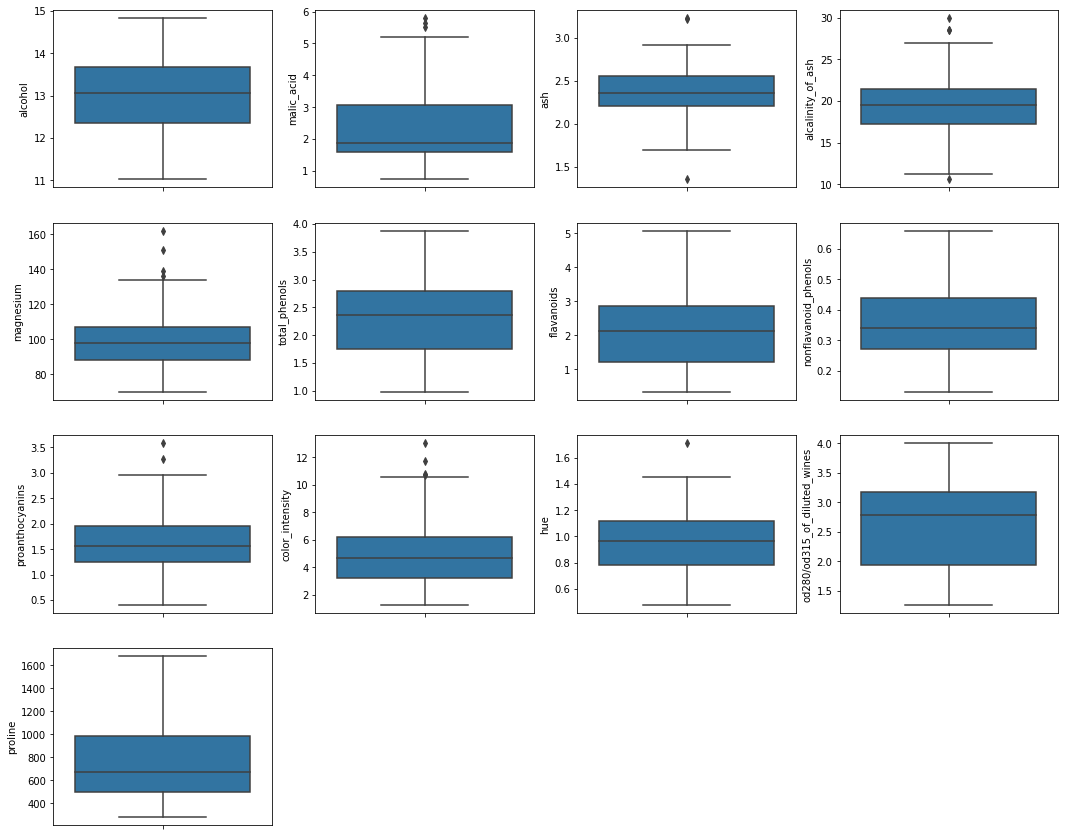

In [ ]:
cols1 = ['alcohol', 'malic_acid', 'ash', 'alcalinity_of_ash', 'magnesium','total_phenols', 'flavanoids', 'nonflavanoid_phenols','proanthocyanins', 'color_intensity', 'hue',
       'od280/od315_of_diluted_wines', 'proline']
count= 1
plt.figure(figsize=(18,15))
for i in df1[cols1]:
  plt.subplot(4,4,count)
  sns.boxplot(y=i, data = df1)
  count= count +1
plt.show()

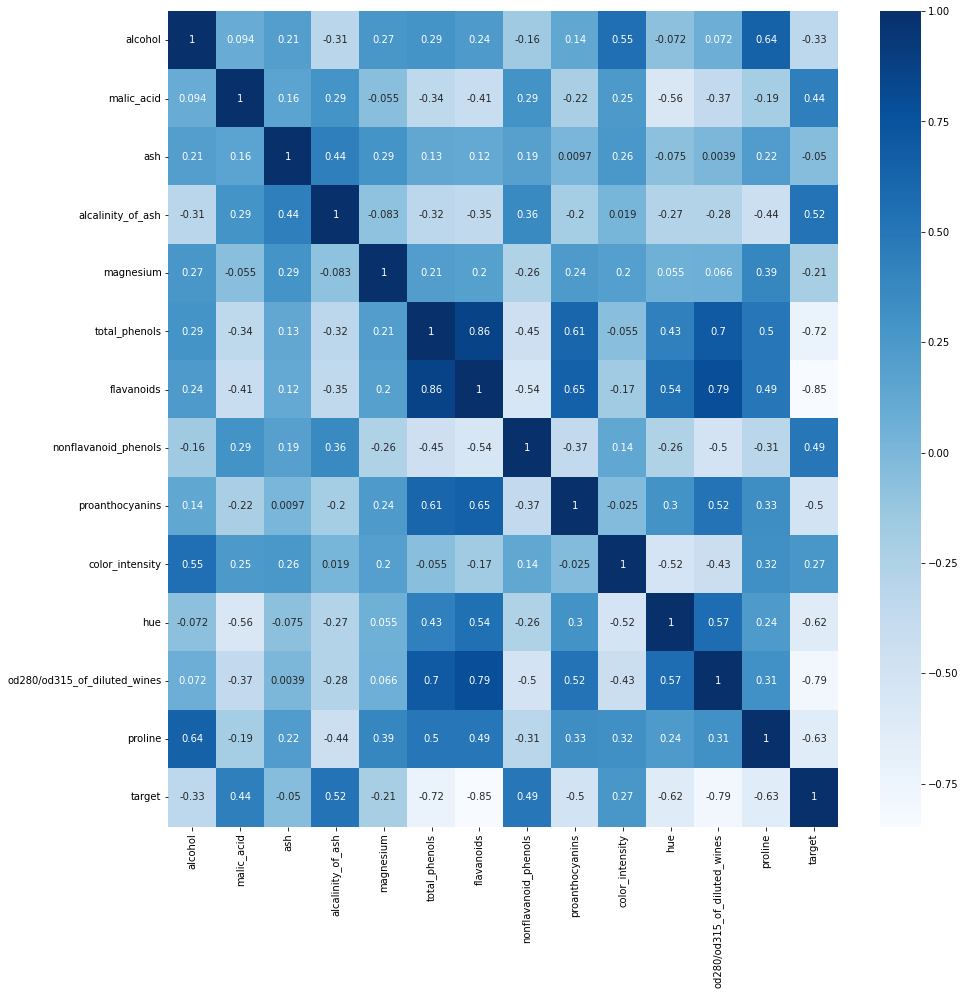

In [ ]:
plt.figure(figsize=(15,15))
sns.heatmap(df1.corr(), cmap='Blues',annot=True)

### Splitting the dataset:

In [ ]:
from sklearn.model_selection import train_test_split

X1= df1.drop(columns= ['target'])
y1= df1['target']

X1_train , X1_test , y1_train, y1_test = train_test_split(X1,y1,test_size = 0.3 , random_state =16)

In [ ]:
print("Size of training data : ", X1_train.shape)
print("Size of testing data : ", X1_test.shape)

Size of training data :  (124, 13)
Size of testing data :  (54, 13)


In [ ]:
scaler = StandardScaler()
X1_train = pd.DataFrame(data = scaler.fit_transform(X1_train), columns = X1_train.columns)
X1_test = pd.DataFrame(data = scaler.transform(X1_test) , columns = X1_test.columns)

###Model Training:

In [ ]:
lr1 = LogisticRegression()
lr1.fit(X1_train,y1_train)

LogisticRegression()

In [ ]:
lr1_pred=lr1.predict(X1_test)

In [ ]:
CM_LR1 = confusion_matrix(y1_test,lr1_pred)
CR_LR1 = classification_report(y1_test,lr1_pred)
print("Confusion Matrix:\n",CM_LR1)
print("\nClassification Report:\n",CR_LR1)
print("Accuracy:", accuracy_score(y1_test, lr1_pred))
print("Precision:", precision_score(y1_test, lr1_pred, average='weighted'))
print("Recall:", recall_score(y1_test, lr1_pred , average='weighted'))
print("F1:", f1_score(y1_test, lr1_pred , average='weighted'))

Confusion Matrix:
 [[17  0  0]
 [ 0 19  0]
 [ 0  0 18]]

Classification Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00        17
           1       1.00      1.00      1.00        19
           2       1.00      1.00      1.00        18

    accuracy                           1.00        54
   macro avg       1.00      1.00      1.00        54
weighted avg       1.00      1.00      1.00        54

Accuracy: 1.0
Precision: 1.0
Recall: 1.0
F1: 1.0


In this model, the performance metrics has value = 1 on the test dataset and therefore the result is achieved.

## **BREAST CANCER WINCONSIN DATASET:**

In [ ]:
from sklearn.datasets import load_breast_cancer

### Loading the dataset:

In [ ]:
dataset2 = load_breast_cancer()
dataset2

{'data': array([[1.799e+01, 1.038e+01, 1.228e+02, ..., 2.654e-01, 4.601e-01,
         1.189e-01],
        [2.057e+01, 1.777e+01, 1.329e+02, ..., 1.860e-01, 2.750e-01,
         8.902e-02],
        [1.969e+01, 2.125e+01, 1.300e+02, ..., 2.430e-01, 3.613e-01,
         8.758e-02],
        ...,
        [1.660e+01, 2.808e+01, 1.083e+02, ..., 1.418e-01, 2.218e-01,
         7.820e-02],
        [2.060e+01, 2.933e+01, 1.401e+02, ..., 2.650e-01, 4.087e-01,
         1.240e-01],
        [7.760e+00, 2.454e+01, 4.792e+01, ..., 0.000e+00, 2.871e-01,
         7.039e-02]]),
 'target': array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0,
        0, 0, 1, 0, 1, 1, 1, 1, 1, 0, 0, 1, 0, 0, 1, 1, 1, 1, 0, 1, 0, 0,
        1, 1, 1, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 1, 1, 1, 0, 0, 1, 0, 0, 0,
        1, 1, 1, 0, 1, 1, 0, 0, 1, 1, 1, 0, 0, 1, 1, 1, 1, 0, 1, 1, 0, 1,
        1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 1, 0, 0, 1, 1, 1, 0

In [ ]:
df2 = pd.DataFrame(data = dataset2.data ,columns = dataset2.feature_names)

In [ ]:
df2['target']=dataset2.target
df2['target'].replace({0:'malignant',1:'benign'}, inplace =True)

In [ ]:
df2.head()

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension,target
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,...,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,malignant
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,...,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,malignant
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,...,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,malignant
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744,...,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,malignant
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883,...,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,malignant


### Performing the exploration:

In [ ]:
df2.shape

(569, 31)

In [ ]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 31 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   mean radius              569 non-null    float64
 1   mean texture             569 non-null    float64
 2   mean perimeter           569 non-null    float64
 3   mean area                569 non-null    float64
 4   mean smoothness          569 non-null    float64
 5   mean compactness         569 non-null    float64
 6   mean concavity           569 non-null    float64
 7   mean concave points      569 non-null    float64
 8   mean symmetry            569 non-null    float64
 9   mean fractal dimension   569 non-null    float64
 10  radius error             569 non-null    float64
 11  texture error            569 non-null    float64
 12  perimeter error          569 non-null    float64
 13  area error               569 non-null    float64
 14  smoothness error         5

In [ ]:
df.describe()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target
count,150.000000,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.057333,3.758000,1.199333,1.000000
std,0.828066,0.435866,1.765298,0.762238,0.819232
min,4.300000,2.000000,1.000000,0.100000,0.000000
25%,5.100000,2.800000,1.600000,0.300000,0.000000
50%,5.800000,3.000000,4.350000,1.300000,1.000000
75%,6.400000,3.300000,5.100000,1.800000,2.000000
max,7.900000,4.400000,6.900000,2.500000,2.000000


In [ ]:
df2.isnull().sum()

mean radius                0
mean texture               0
mean perimeter             0
mean area                  0
mean smoothness            0
mean compactness           0
mean concavity             0
mean concave points        0
mean symmetry              0
mean fractal dimension     0
radius error               0
texture error              0
perimeter error            0
area error                 0
smoothness error           0
compactness error          0
concavity error            0
concave points error       0
symmetry error             0
fractal dimension error    0
worst radius               0
worst texture              0
worst perimeter            0
worst area                 0
worst smoothness           0
worst compactness          0
worst concavity            0
worst concave points       0
worst symmetry             0
worst fractal dimension    0
target                     0
dtype: int64

In [ ]:
df2.columns

Index(['mean radius', 'mean texture', 'mean perimeter', 'mean area',
       'mean smoothness', 'mean compactness', 'mean concavity',
       'mean concave points', 'mean symmetry', 'mean fractal dimension',
       'radius error', 'texture error', 'perimeter error', 'area error',
       'smoothness error', 'compactness error', 'concavity error',
       'concave points error', 'symmetry error', 'fractal dimension error',
       'worst radius', 'worst texture', 'worst perimeter', 'worst area',
       'worst smoothness', 'worst compactness', 'worst concavity',
       'worst concave points', 'worst symmetry', 'worst fractal dimension',
       'target'],
      dtype='object')

In [ ]:
df2.target.unique()

array(['malignant', 'benign'], dtype=object)

In [ ]:
df2.target.value_counts()

benign       357
malignant    212
Name: target, dtype: int64

Imbalance class problem

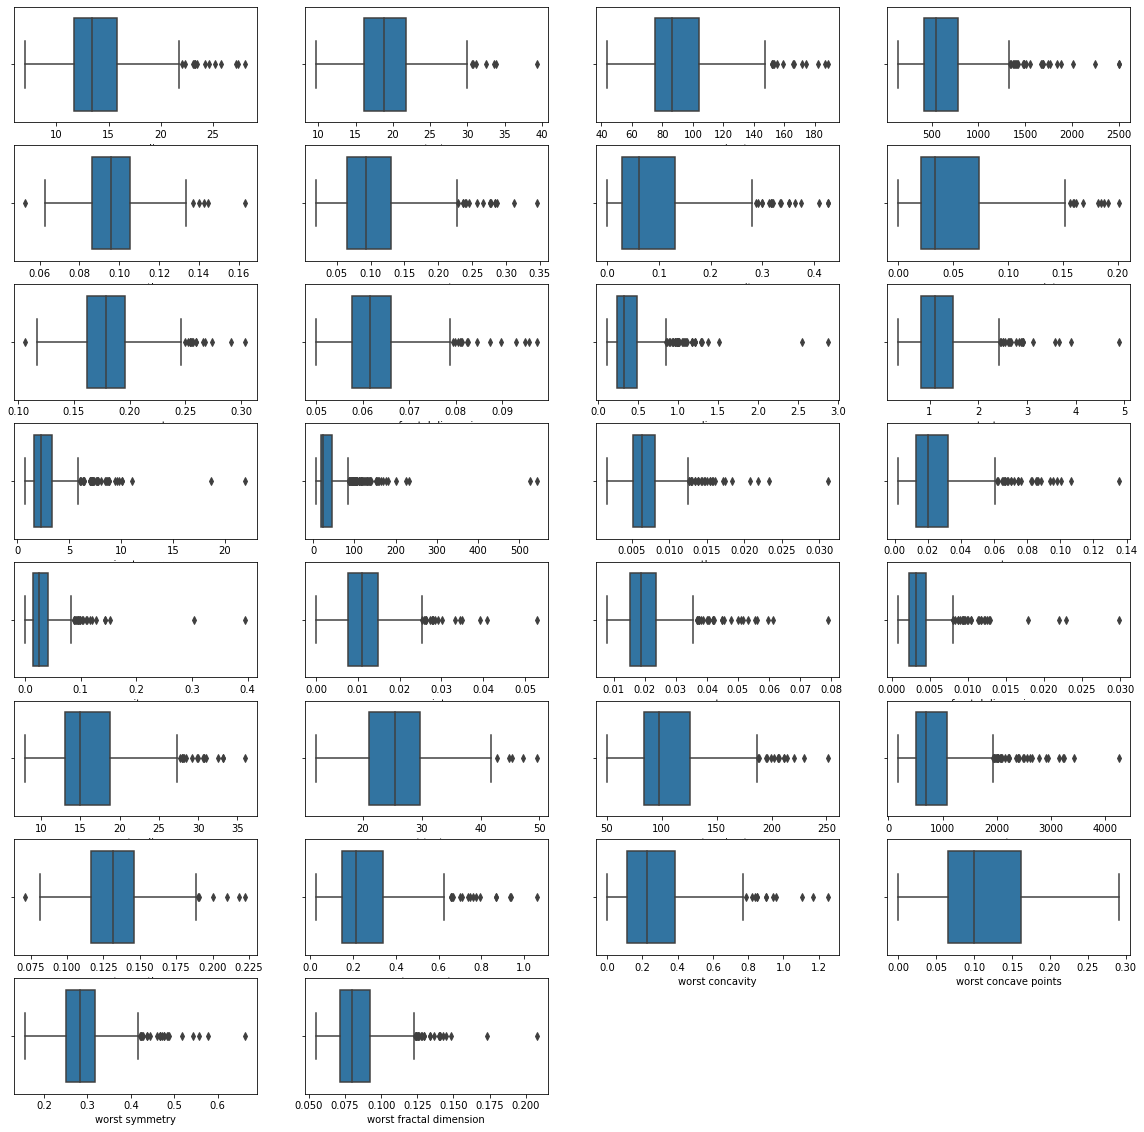

In [ ]:
cols = ['mean radius', 'mean texture', 'mean perimeter', 'mean area','mean smoothness', 'mean compactness', 'mean concavity','mean concave points', 'mean symmetry',
        'mean fractal dimension','radius error', 'texture error', 'perimeter error', 'area error','smoothness error', 'compactness error', 'concavity error',
       'concave points error', 'symmetry error', 'fractal dimension error','worst radius', 'worst texture', 'worst perimeter', 'worst area','worst smoothness', 
        'worst compactness', 'worst concavity', 'worst concave points', 'worst symmetry', 'worst fractal dimension']

plt.figure(figsize=(20, 20))
count = 1
for i in df2[cols]:
  plt.subplot(8,4,count)
  sns.boxplot(x=i, data = df2)
  count= count+1
plt.show()

Except for ***worst concave points***, all the features have outliers.

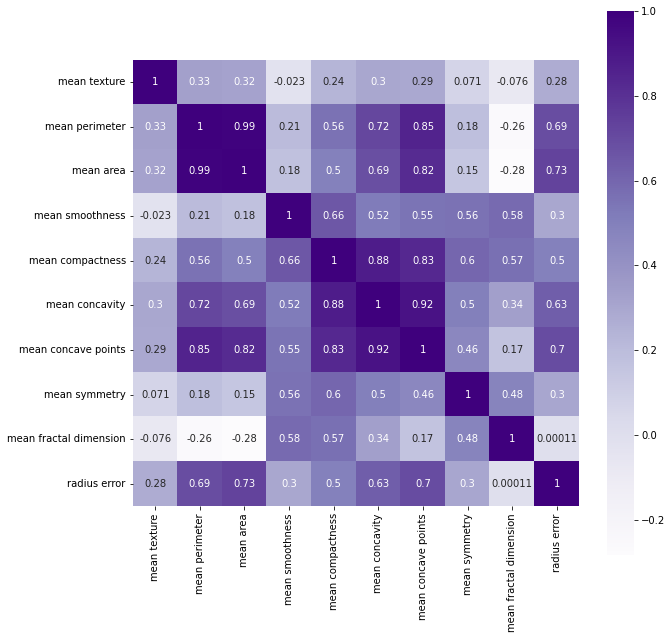

In [ ]:
featureMeans = list(df2.columns[1:11])
plt.figure(figsize=(10,10))
sns.heatmap(df2[featureMeans].corr(), cmap='Purples',square = True, annot=True)

In [ ]:
df2.target = LabelEncoder().fit_transform(np.array(df2['target']))
df2['target']

0      1
1      1
2      1
3      1
4      1
      ..
564    1
565    1
566    1
567    1
568    0
Name: target, Length: 569, dtype: int64

### Splitting the dataset:

In [ ]:
from sklearn.model_selection import train_test_split

X2= df2.drop(columns= ['target'])
y2= df2['target']

X2_train , X2_test , y2_train, y2_test = train_test_split(X2,y2,test_size = 0.3 , random_state =16)

In [ ]:
print("Size of training data : ", X2_train.shape)
print("Size of testing data : ", X2_test.shape)

Size of training data :  (398, 30)
Size of testing data :  (171, 30)


In [ ]:
scaler = StandardScaler()
X2_train = pd.DataFrame(data = scaler.fit_transform(X2_train), columns = X2_train.columns)
X2_test = pd.DataFrame(data = scaler.transform(X2_test) , columns = X2_test.columns)

### Model Training:

In [ ]:
lr2 = LogisticRegression()
lr2.fit(X2_train,y2_train)

LogisticRegression()

In [ ]:
lr2_pred=lr2.predict(X2_test)

In [ ]:
CM_LR2 = confusion_matrix(y2_test,lr2_pred)
CR_LR2 = classification_report(y2_test,lr2_pred)
print("Confusion Matrix:\n",CM_LR2)
print("\nClassification Report:\n",CR_LR2)
print("Accuracy:", accuracy_score(y2_test, lr2_pred))
print("Precision:", precision_score(y2_test, lr2_pred, average='weighted'))
print("Recall:", recall_score(y2_test, lr2_pred , average='weighted'))
print("F1:", f1_score(y2_test, lr2_pred , average='weighted'))

Confusion Matrix:
 [[104   2]
 [  4  61]]

Classification Report:
               precision    recall  f1-score   support

           0       0.96      0.98      0.97       106
           1       0.97      0.94      0.95        65

    accuracy                           0.96       171
   macro avg       0.97      0.96      0.96       171
weighted avg       0.96      0.96      0.96       171

Accuracy: 0.9649122807017544
Precision: 0.9649741638045731
Recall: 0.9649122807017544
F1: 0.9648021191998689


Only 6 predictions are missclassified.

Plotting the ROC curve and the Precision-Recall curve:


In [ ]:
from sklearn.metrics import RocCurveDisplay, roc_curve, auc, precision_recall_curve, plot_precision_recall_curve

AUC: 0.9597968069666183




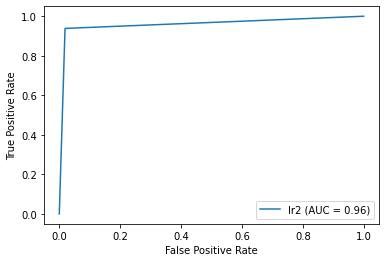

In [ ]:
fpr, tpr , threshold = roc_curve(y2_test, lr2_pred)
auc1 = auc(fpr, tpr)
print("AUC:" ,auc1)
print("\n")
display1 = RocCurveDisplay(fpr=fpr,tpr=tpr, roc_auc=auc1 , estimator_name='lr2')
display1.plot()
plt.show()

AUC score of precision against recall : 0.965053659790502




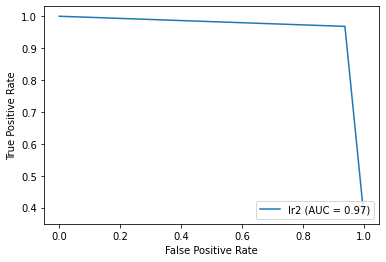

In [ ]:
precision = precision_score(y2_test, lr2_pred, average='weighted')
recall = recall_score(y2_test, lr2_pred , average='weighted')

precision, recall , thresholds = precision_recall_curve(y2_test, lr2_pred)
auc_pr = auc(recall,precision)
print("AUC score of precision against recall :" ,auc_pr)
print("\n")
display = RocCurveDisplay(fpr=recall,tpr=precision, roc_auc=auc_pr , estimator_name='lr2')
display.plot()
plt.show()

## **Obtaining the Mammography dataset**

In [32]:
data = pd.read_table('http://archive.ics.uci.edu/ml/machine-learning-databases/mammographic-masses/mammographic_masses.data',delimiter = ',',header = None)

In [33]:
data.columns = ['BI-RADS','Age', 'Shape','Margin','Density','Severity']

In [34]:
data.head()

,BI-RADS,Age,Shape,Margin,Density,Severity
0,5,67,3,5,3,1
1,4,43,1,1,?,1
2,5,58,4,5,3,1
3,4,28,1,1,3,0
4,5,74,1,5,?,1


In [35]:
data.shape

(961, 6)